In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle 

from prep_lake_data import interpolate_n_clip, prep_lake
from model_loop4 import model_eval

import random
random.seed(23846)

In [2]:
# get lake data
with open(f'saves/lake_data_dicts.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
# the shared x to align data
new_time = np.arange(2019,2023,1/12)
data_w_interp = interpolate_n_clip(new_time,data)

lakes removed total: 2951.0/9558 for SigmaObs: 1023.0, non neg: 0.0, too short: 238.0, not whole range: 853.0, many gaps in cycle: 782.0, big holes in cycle: 55.0


In [4]:
lakes = list(data_w_interp.keys())
lake_count = [np.any(data_w_interp[lake]['interp good']) for lake in lakes]
np.sum(lake_count)

3946

In [5]:
data_w_interp_nn = interpolate_n_clip(new_time,data, non_neg=True)

lakes removed total: 3243.0/9558 for SigmaObs: 957.0, non neg: 429.0, too short: 225.0, not whole range: 820.0, many gaps in cycle: 758.0, big holes in cycle: 54.0


In [6]:
lakes = list(data_w_interp_nn.keys())
lake_count = [np.any(data_w_interp_nn[lake]['interp good']) for lake in lakes]
np.sum(lake_count)

3761

In [7]:
data_w_interp_select = interpolate_n_clip(new_time,data, area=True, non_neg=True)

lakes removed total: 12.0/112 for SigmaObs: 2.0, non neg: 0.0, too short: 0.0, not whole range: 10.0, many gaps in cycle: 0.0, big holes in cycle: 0.0


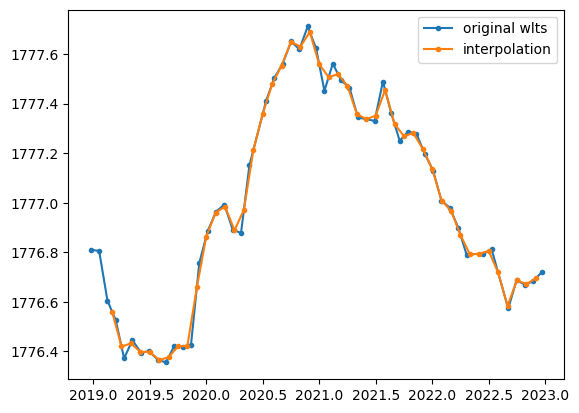

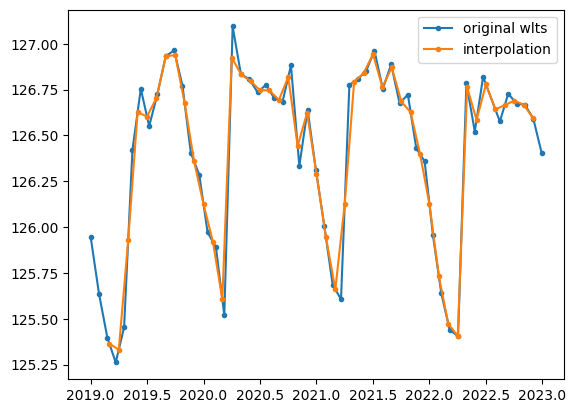

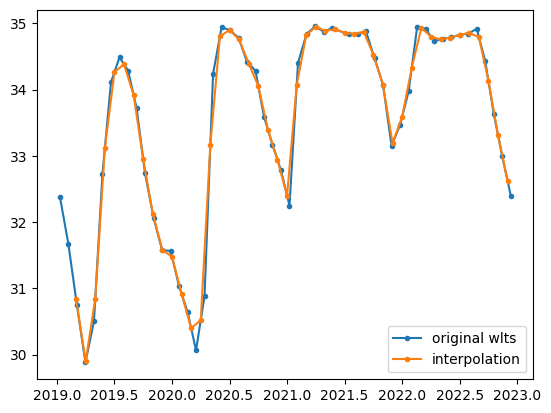

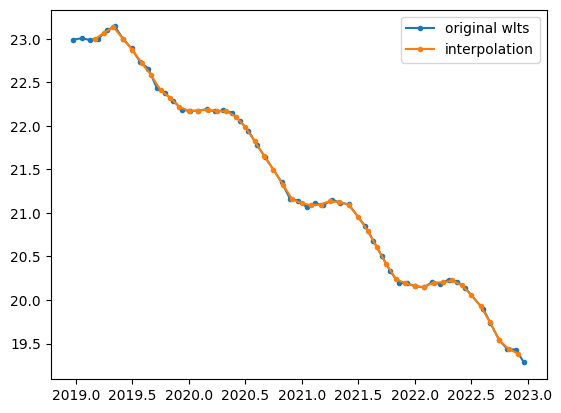

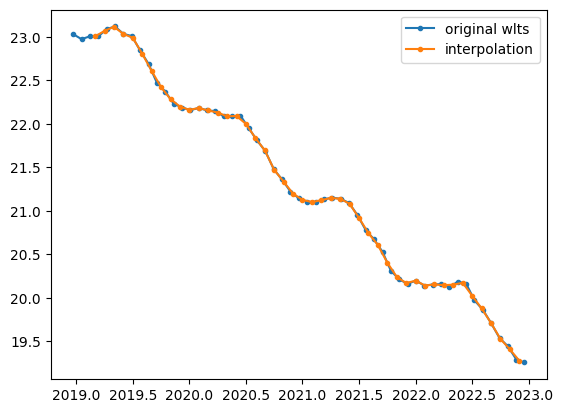

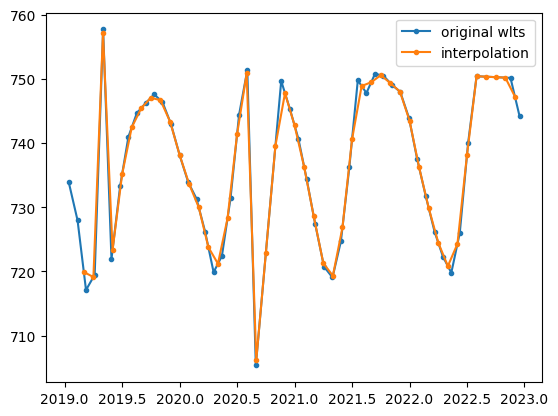

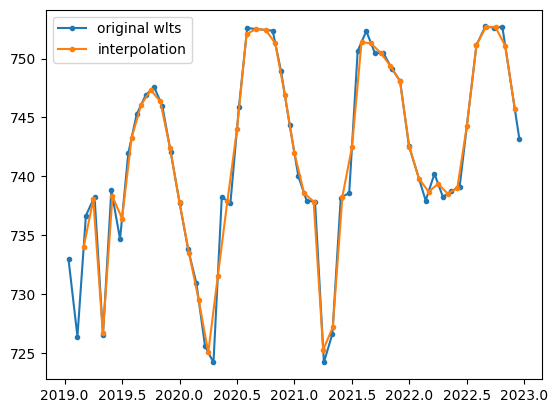

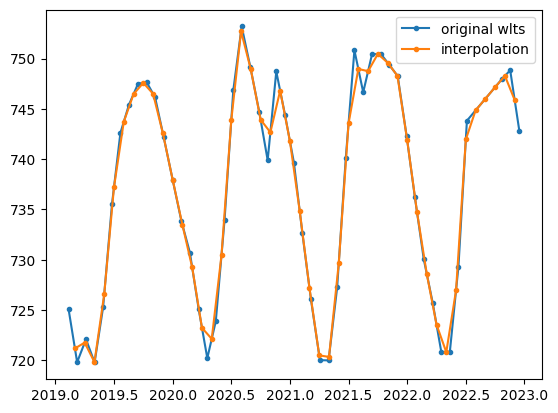

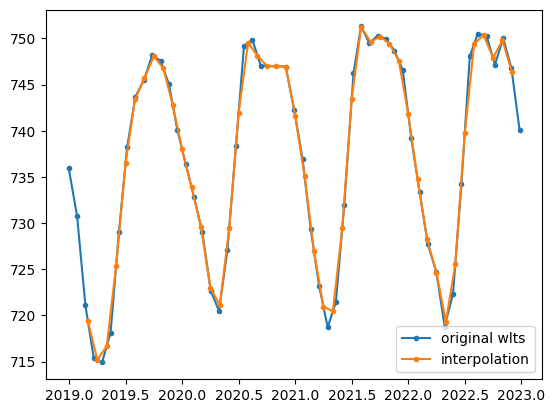

In [6]:
lakes = list(data_w_interp.keys())
for j, lake in enumerate([lakes[1], lakes[1000], lakes[2000], 4610055052, 7820071213]):
    for i, good in enumerate(data_w_interp[lake]['interp good']):
        if good:
            new_wl = data_w_interp[lake]['interp wlts'][i]
            (time,wl)=data_w_interp[lake]['clip wlts'][i]
            plt.plot(time,wl, '.-', label='original wlts')
            plt.plot(new_time,new_wl,'.-', label='interpolation')
            plt.legend()
            plt.savefig(f"plots/interpolation example {j}.png", 
                bbox_inches='tight', facecolor ="w", dpi=200)
            plt.show()